# Initial Value Problems

Initial Value Problems are a common type of problem encountered when simulating a physical system's progression with time. Given a series of initial values, a system of Ordinary Differential Equations (ODEs) are solved to solve the progression of the system. For instance, the rate of change of the number of bacteria $N(t)$ in a growth medium might be described as:

$\frac{\textrm{d}N(t)}{\textrm{d}t} = \alpha N(t)$

where $\alpha$ is a growth rate. If there are initially 10 bacteria at $t=0$, the number of bacteria as a function of time can be solved as follows:

$N(t)=10e^{\alpha t}$

This example could be solved analytically, but other systems of equations are more complex. In this case, SciPy's ```scipy.integrate.solve_ivp``` function ([manual page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)) can be very useful for calculating the evolution of a physical system over time.

```scipy.integrate.solve_ivp``` can solve the time-progression of a collection of values, presented as a vector. The function requires another function be passed to it which describes the system of equations which give the derivative as a function of the values passed to it and the current time of the system as arguments.

It also takes the initial value of the system (as an array) and an array of times for which the values of the equations to be solved for are to be found. It may optionally take a tuple of values which will be passed as arguments to the function which calculates the derivative. This means the values used in the derivative function don't need to be hard-coded in the function.

As an example, we'll consider the [Lorenz system of equations](https://en.wikipedia.org/wiki/Lorenz_system), which arises in simplified models of a number of physical systems including lasers, electric circuits and chemical reactions. The system of equations governing the derivative of its three variables ($x$, $y$ and $z$) are as follows:

$
\frac{\textrm{d}x(t)}{\textrm{d}t} = \sigma(y - x)\\
\frac{\textrm{d}y(t)}{\textrm{d}t} = x(\rho - z) - y\\
\frac{\textrm{d}z(t)}{\textrm{d}t} = xy - \beta z
$

Because we are solving for three variables as a function of time, the arrays which hold the state of the system at a particular time (or the rate of change of the system at a particular time) will be one-dimensional arrays with a size of 3.

$\beta$, $\sigma$ and $\rho$ are parameters which define the behaviour of the system. By picking values of 10, 8/3 and 28, we make the system  chaotic, which means we expect some interesting results.


<class 'scipy.integrate._ivp.ivp.OdeResult'>
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1778
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
       1.999e+01])
 t_events: None
        y: array([[ 1.        ,  1.10667664,  1.22750479, ..., -7.52758147,
        -6.73264555, -5.9804852 ],
       [ 2.        ,  2.24218301,  2.51087714, ...,  0.61037238,
         1.01337924,  1.30657718],
       [ 3.        ,  2.94309803,  2.89300303, ..., 34.2464306 ,
        33.28714789, 32.33768343]])
 y_events: None
Output shape:  (3, 2000)
Time:  [0.000e+00 1.000e-02 2.000e-02 ... 1.997e+01 1.998e+01 1.999e+01]
First:  [1. 2. 3.]
Last:  [-5.9804852   1.30657718 32.33768343]


<Figure size 432x288 with 0 Axes>

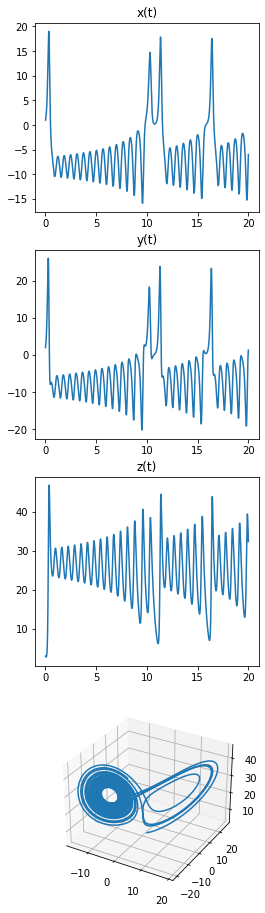

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# This function returns an array described the rate of change (i.e. [dx/dt, dy/dt, dz/dt]) of the system
# It accepts the current time and a vector describing the current state (i.e. [x, y, z])
# The parameters sigma, beta and rho are used to accept their values from the tuple of arguments passed to solve_ivp
# To be used to provide the derivative to solve_ivp, extra arguments (sigma, beta, rho) is not required by solve_ivp
# However, this pattern allows 
def derivative(t, vec, sigma, beta, rho):
  # Create the array to hold the rate of change of the system
  result = np.zeros(3)

  # Calculate the rates of change
  result[0] = sigma * (vec[1] - vec[0])
  result[1] = vec[0] * (rho - vec[2]) -vec[1]
  result[2] = vec[0] * vec[1] - beta * vec[2]

  # Return the rate of change
  return(result)

# Set up an array describing the start and stop time of the simulation
t_span = np.array([0, 20])

# Set up the array of times at which the state of the system will be calculated
t_steps = np.arange(0, 20, 0.01)

# Create the values representing the initial state of the system, i.e. [x(0)=1, y(0)=2, z(0)=3]
initial_value = np.array([1,2,3])

# Set up the parameters of the system
sigma = 10
beta = 8 / 3
rho = 28

# Calculate the time series of values
# The returned value contains the state of the system at each of the requested times
# The first dimension of time_series represents the different times
# The second dimension represents the different values of the system, e.g. [x, y, z]
# For instance time_series[10, 1] represents the value of y at the 11th time
results = solve_ivp(derivative, t_span, initial_value, t_eval=t_steps, args = (sigma, beta, rho))

# The results returned is an object which contains the results of the simulation and associated messages and values
print(type(results))
print(results)
# The most important data is the time of the time steps of the outputs stored in results.t and the values of the variables as a function of time in results.y

# Print the output shape. The first dimension relates to each of the output variables we're solving for. The second relates to the time steps
print("Output shape: ", results.y.shape)
#Print the times array (numpy skips the middle values for a large array)
print("Time: ", results.t)
# Print the first values of the system
print("First: ", results.y[:, 0])
#Print the last values of the system
print("Last: ", results.y[:, -1])

# The rest of this is required to plot the figures
# Particularly if you're unfamiliar with matplotlib, you can ignore it
fig = plt.figure()
plt.subplots_adjust(hspace=0.5)
fig = plt.figure(figsize=plt.figaspect(4))

ax = fig.add_subplot(4, 1, 1)
ax.plot(results.t, results.y[0, :])
ax.set_title('x(t)')

ax = fig.add_subplot(4, 1, 2)
ax.plot(results.t, results.y[1, :])
ax.set_title('y(t)')

ax = fig.add_subplot(4, 1, 3)
ax.plot(results.t, results.y[2, :])
ax.set_title('z(t)')

ax = fig.add_subplot(4, 1, 4, projection='3d')
ax.plot(results.y[0, :], results.y[1, :], results.y[2, :])

plt.show()

## Exercise

A predator-prey cycle describes a dynamic system where the number of members of a prey species and a predator species are linked. This relationship means that when the population of prey is low, the population of predators fall and when it is high, the number of predators falls. When the number of predators is high, the number of prey falls and when the number of predators is low the number of prey rises. This type of equation is described by the [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations):

$
\frac{\textrm{d}x(t)}{\textrm{d}t} = \alpha x - \beta xy\\
\frac{\textrm{d}y(t)}{\textrm{d}t} = \delta xy - \gamma y\\
$

where $x$ is the number of prey, $y$ is the number of predators and $\alpha$, $\beta$, $\gamma$ and $\delta$ are parameters which describe the behaviour of the system.

In the code below, use ```solve_ivp``` to calculate the time progression over 100 months of the number of prey and predators in a system given that there are initially 1000 predators and 2000 prey and the system has the following values:

$\alpha = 1/\textrm{month}\\
\beta = 5\times10^{-4}/\textrm{month}\\
\gamma = 0.5/\textrm{month}\\
\delta = 1\times10^{-4}/\textrm{month}$

The code already provided will plot the output providing the results of ```solve_ivp``` in the variable ```results``` with the first dimension representing time and the second representing the population (e.g. ```results.y[1,2]``` would be the number of predators at the third time step).

In [ ]:




# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
import matplotlib.pyplot as plt
plt.plot(results.t, results.y[0, :], label = "Prey")
plt.plot(results.t, results.y[1, :], label = "Predator")
plt.legend()

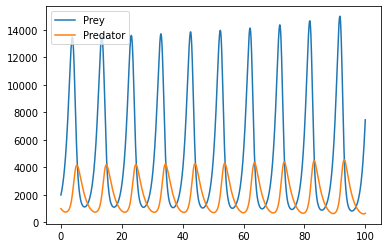

In [9]:
#@title

import numpy as np
from scipy.integrate import solve_ivp

# The function which defines the rate of change with the system as a function of time
def derivative(t, vec, alpha, beta, gamma, delta):
  # Create the array to hold the rate of change of the system
  result = np.zeros(2)

  # Calculate the rates of change
  result[0] = alpha * vec[0] - beta * vec[0] * vec[1]
  result[1] = delta * vec[0] * vec[1] - gamma * vec[1]

  # Return the rate of change
  return(result)

# Set up an array describing the start and stop time of the simulation
t_span = np.array([0, 100])

# Set up the array of times at which the state of the system will be calculated
t_steps = np.arange(0, 100, 0.01)

# Create the values representing the initial state of the system, i.e. [x(0)=1, y(0)=2, z(0)=3]
initial_value = np.array([1,2,3])

# Create the values representing the initial state of the system, i.e. 2000 prey and 1000 predators
initial_value = np.array([2000, 1000])

# Set up the parameters of the system
alpha = 1
beta = 5e-4
gamma = 0.5
delta = 1e-4

# Solve the initial value problem
results = solve_ivp(derivative, t_span, initial_value, t_eval=t_steps, args = (alpha, beta, gamma, delta))

# Below here are the commands to plot the output figure
# You don't need to and shouldn't edit them
import matplotlib.pyplot as plt
plt.plot(results.t, results.y[0, :], label = "Prey")
plt.plot(results.t, results.y[1, :], label = "Predator")
plt.legend()